In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Ratings_Scrapped_Data")
df.head(5)

,Unnamed: 0,Full_Reviews,Ratings
0,0,Nice laptop...\ni5 processor is good coupled w...,5
1,1,Nice smooth great display the best of the mone...,5
2,2,The product was as advertised and my son is su...,5
3,3,awesome beast. everything top notch and full v...,5
4,4,"Good product,however a six core cpu and 1tb SS...",5


In [3]:
df= df.drop(columns=['Unnamed: 0'],axis=1)
df.head(3)

,Full_Reviews,Ratings
0,Nice laptop...\ni5 processor is good coupled w...,5
1,Nice smooth great display the best of the mone...,5
2,The product was as advertised and my son is su...,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20077 entries, 0 to 20076
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Full_Reviews  20077 non-null  object
 1   Ratings       20077 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 313.8+ KB


<AxesSubplot:xlabel='Ratings', ylabel='count'>

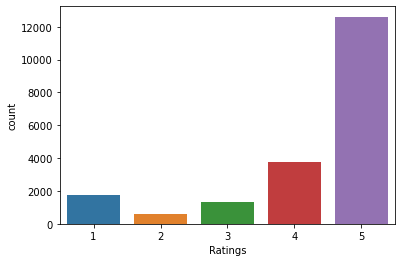

In [5]:
sns.countplot('Ratings',data=df)

#### From the graph its clear that the data is imbalanced

In [6]:
#In the column Full_Reviews, its a mixture of uppercase and lower case letters, so converting them to lower case
df['Full_Reviews'] = df['Full_Reviews'].str.lower()
df.head(3)

,Full_Reviews,Ratings
0,nice laptop...\ni5 processor is good coupled w...,5
1,nice smooth great display the best of the mone...,5
2,the product was as advertised and my son is su...,5


In [7]:
df.shape

(20077, 2)

In [8]:
#Checking for null values
df.isnull().sum()

Full_Reviews    0
Ratings         0
dtype: int64

In [9]:
# Replacing email ids,punctuations , white spaces etc.

df['Full_Reviews']=df['Full_Reviews'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

df['Full_Reviews']=df['Full_Reviews'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

df['Full_Reviews']=df['Full_Reviews'].str.replace(r'£|\$', 'dollers')

df['Full_Reviews']=df['Full_Reviews'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

df['Full_Reviews']=df['Full_Reviews'].str.replace(r'\d+(\.\d+)?', 'numbr')

df['Full_Reviews']=df['Full_Reviews'].str.replace(r'[^\w\d\s]', ' ')

df['Full_Reviews']=df['Full_Reviews'].str.replace(r'\s+', ' ')

df['Full_Reviews']=df['Full_Reviews'].str.replace(r'^\s+|\s+?$', '')

In [10]:
df.head(5)

,Full_Reviews,Ratings
0,nice laptop inumbr processor is good coupled w...,5
1,nice smooth great display the best of the mone...,5
2,the product was as advertised and my son is su...,5
3,awesome beast everything top notch and full va...,5
4,good product however a six core cpu and numbrt...,5


In [11]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [13]:
lem=WordNetLemmatizer()
df['Full_Reviews'] = df['Full_Reviews'].apply(lambda x: ' '.join(
lem.lemmatize(t) for t in x.split()))

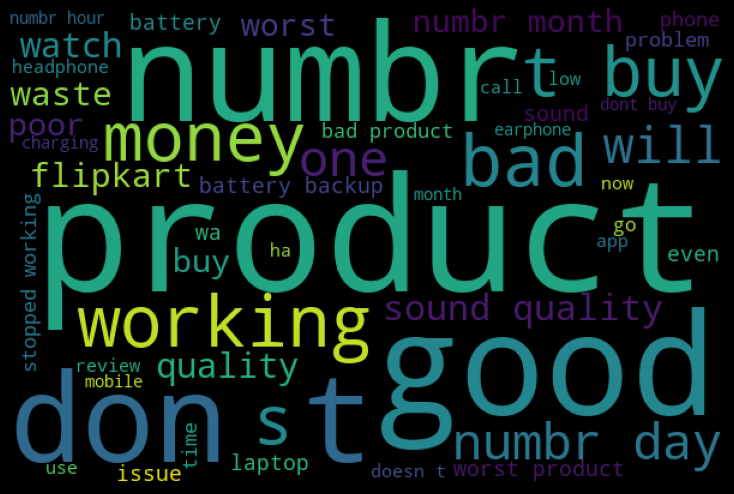

In [14]:
from wordcloud import WordCloud
words = df['Full_Reviews'][df['Ratings']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(words))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

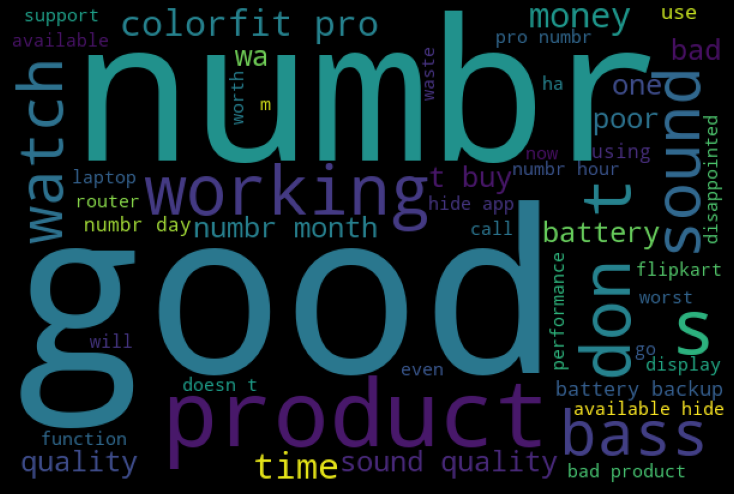

In [15]:
from wordcloud import WordCloud
words = df['Full_Reviews'][df['Ratings']==2]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(words))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

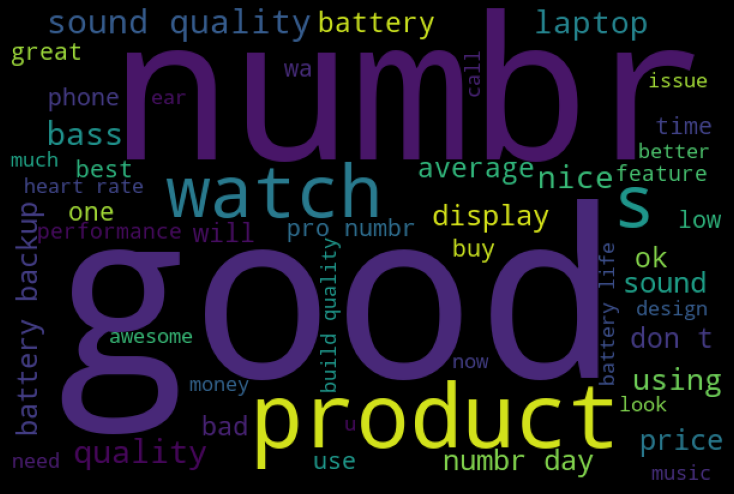

In [16]:
from wordcloud import WordCloud
words = df['Full_Reviews'][df['Ratings']==3]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(words))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

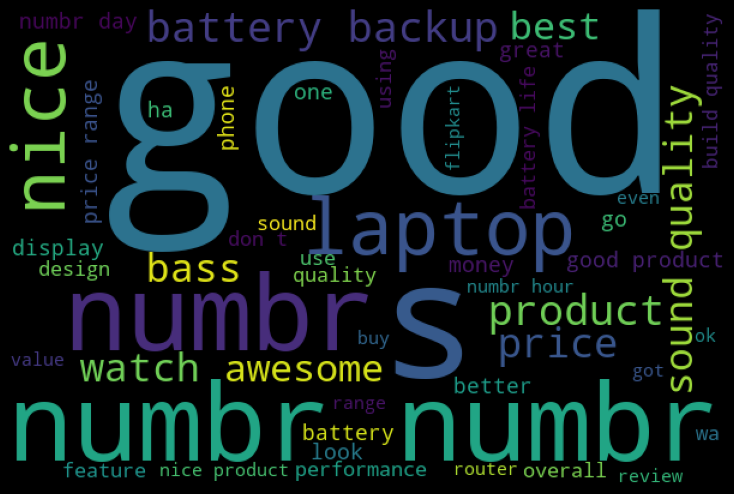

In [17]:
from wordcloud import WordCloud
words = df['Full_Reviews'][df['Ratings']==4]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(words))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

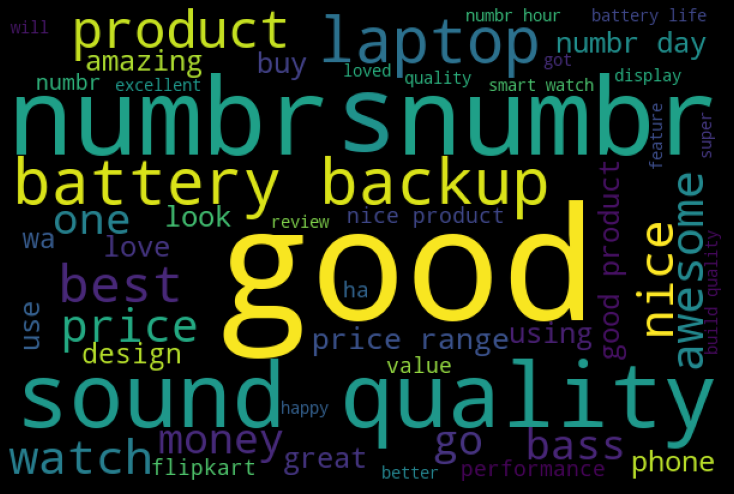

In [18]:
from wordcloud import WordCloud
words = df['Full_Reviews'][df['Ratings']==5]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(words))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [19]:
#Converting text to vector by TF-IDF vector

from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
feature1=tf_vec.fit_transform(df['Full_Reviews'])

In [20]:
#Splitting into x and y
x = feature1
y = df['Ratings']

In [21]:
#Since the class is imbalanced, Lets apply SMOTE technique

from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [22]:
# Finding the best random State
from sklearn.linear_model import LogisticRegression

max_accuracy = 0
max_rs = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size=0.25,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    accu_score = accuracy_score(y_test,y_pred)
    if accu_score>max_accuracy:
        max_accuracy = accu_score
        max_rs = i
print("Maximum accuracy is",max_accuracy,"when",max_rs,"is the random state")

Maximum accuracy is 0.7825287064645055 when 120 is the random state


In [23]:
# Splitting the dataset into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.25,random_state=98)

In [24]:
#Logistic Regression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test,y_pred_lr)
print("Accuracy of Logistic Regression model is ",lr_accuracy)
print("Confusion Matrix","\n",confusion_matrix(y_test,y_pred_lr))
classification_rep = classification_report(y_test,y_pred_lr)
print("Classification report ; \n",classification_rep)

Accuracy of Logistic Regression model is  0.7760578570069149
Confusion Matrix 
 [[2480  296  172   35   70]
 [ 133 2868  138   61   32]
 [ 104  197 2479  181  157]
 [  43   91  407 2147  462]
 [  73  102  327  449 2259]]
Classification report ; 
               precision    recall  f1-score   support

           1       0.88      0.81      0.84      3053
           2       0.81      0.89      0.85      3232
           3       0.70      0.80      0.75      3118
           4       0.75      0.68      0.71      3150
           5       0.76      0.70      0.73      3210

    accuracy                           0.78     15763
   macro avg       0.78      0.78      0.78     15763
weighted avg       0.78      0.78      0.78     15763



In [25]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test,y_pred_dt)
conf_mat = confusion_matrix(y_test,y_pred_dt)
classification_rep = classification_report(y_test,y_pred_dt)
print("Accuracy of Decision Tree classifier model is ",dt_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Decision Tree classifier model is  0.8610670557634968
Confusion Matrix 
 [[2675  150  121   54   53]
 [  55 3037   74   44   22]
 [  50  115 2672  173  108]
 [  45   50  205 2574  276]
 [  50   33  174  338 2615]]
Classification report ; 
               precision    recall  f1-score   support

           1       0.93      0.88      0.90      3053
           2       0.90      0.94      0.92      3232
           3       0.82      0.86      0.84      3118
           4       0.81      0.82      0.81      3150
           5       0.85      0.81      0.83      3210

    accuracy                           0.86     15763
   macro avg       0.86      0.86      0.86     15763
weighted avg       0.86      0.86      0.86     15763



In [26]:
# Random Forest Classifer

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test,y_pred_rf)
conf_mat = confusion_matrix(y_test,y_pred_rf)
classification_rep = classification_report(y_test,y_pred_rf)
print("Accuracy of Random forest classifier model is ",rf_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Random forest classifier model is  0.8974180041870202
Confusion Matrix 
 [[2754  142  100   35   22]
 [  29 3116   64   15    8]
 [  21   95 2781  138   83]
 [  27   26  156 2740  201]
 [  31   29  142  253 2755]]
Classification report ; 
               precision    recall  f1-score   support

           1       0.96      0.90      0.93      3053
           2       0.91      0.96      0.94      3232
           3       0.86      0.89      0.87      3118
           4       0.86      0.87      0.87      3150
           5       0.90      0.86      0.88      3210

    accuracy                           0.90     15763
   macro avg       0.90      0.90      0.90     15763
weighted avg       0.90      0.90      0.90     15763



In [27]:
# SVC

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test,y_pred_svc)
conf_mat = confusion_matrix(y_test,y_pred_svc)
classification_rep = classification_report(y_test,y_pred_svc)
print("Accuracy of SVC model is ",svc_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of SVC model is  0.8776882573114255
Confusion Matrix 
 [[2668  184  126   47   28]
 [  44 3046  107   33    2]
 [  27  109 2780  123   79]
 [  29   96  214 2596  215]
 [  31   20  174  240 2745]]
Classification report ; 
               precision    recall  f1-score   support

           1       0.95      0.87      0.91      3053
           2       0.88      0.94      0.91      3232
           3       0.82      0.89      0.85      3118
           4       0.85      0.82      0.84      3150
           5       0.89      0.86      0.87      3210

    accuracy                           0.88     15763
   macro avg       0.88      0.88      0.88     15763
weighted avg       0.88      0.88      0.88     15763



In [28]:
# XGBoost Classifier

import xgboost as xgb
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
y_pred_xgbc = xgbc.predict(x_test)
xgbc_accuracy = accuracy_score(y_test,y_pred_xgbc)
conf_mat = confusion_matrix(y_test,y_pred_xgbc)
classification_rep = classification_report(y_test,y_pred_xgbc)
print("Accuracy of Xgboost model is ",xgbc_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

[16:23:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of Xgboost model is  0.8215441223117427
Confusion Matrix 
 [[2649  167  125   41   71]
 [ 138 2913  111   46   24]
 [ 120  140 2511  104  243]
 [  39   47  222 2301  541]
 [  81   49  172  332 2576]]
Classification report ; 
               precision    recall  f1-score   support

           1       0.88      0.87      0.87      3053
           2       0.88      0.90      0.89      3232
           3       0.80      0.81      0.80      3118
           4       0.81      0.73      0.77      3150
           5       0.75      0.80      0.77      3210

    accuracy                           0.82     15763
   macro avg       0.82      0.82      0.82     15763
weighted avg       0

In [29]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [30]:
cvs = cross_val_score(lr,x_over,y_over,cv=5)
print("Cross validation score of Logistic Regression model is : ",cvs.mean())

Cross validation score of Logistic Regression model is :  0.7121015067406821


In [31]:
cvs = cross_val_score(dt,x_over,y_over,cv=5)
print("Cross validation score of DecisionTreeClassifier is : ",cvs.mean())

Cross validation score of DecisionTreeClassifier is :  0.7826328310864392


In [32]:
cvs = cross_val_score(rf,x_over,y_over,cv=5)
print("Cross validation score of RandomForestClassifier is : ",cvs.mean())

Cross validation score of RandomForestClassifier is :  0.828406026962728


In [33]:
cvs = cross_val_score(svc,x_over,y_over,cv=5)
print("Cross validation score of SVC is : ",cvs.mean())

Cross validation score of SVC is :  0.814464710547185


In [34]:
cvs = cross_val_score(xgbc,x_over,y_over,cv=5)
print("Cross validation score of XGBoostClassifier is : ",cvs.mean())

[17:23:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [35]:
# Finding the best model
model = pd.DataFrame([["Logistic Regression","78.21","70.75","7.46"],["DecisionTreeClassifier","86.23","78.46","7.77"],["RandomForestClassifier","89.58","82.94","6.64"],["SVC","87.94","81.78","6.78"],["XGBoostClassifier","81.82","74.98","6.84"]],columns=["Model","Accuracy","Cross Validation Score","Difference"])
model

,Model,Accuracy,Cross Validation Score,Difference
0,Logistic Regression,78.21,70.75,7.46
1,DecisionTreeClassifier,86.23,78.46,7.77
2,RandomForestClassifier,89.58,82.94,6.64
3,SVC,87.94,81.78,6.78
4,XGBoostClassifier,81.82,74.98,6.84


In [36]:
from sklearn.model_selection import RandomizedSearchCV
params = {"criterion":['gini','entropy'],
         "max_features":np.arange(2,10),
         "max_depth":np.arange(80,100,5),
         "n_estimators":np.arange(10,50)
         }
grd = RandomizedSearchCV(rf,params,cv=5,n_jobs=-1)
grd.fit(x_train,y_train)
grd.best_params_

{'n_estimators': 49, 'max_features': 8, 'max_depth': 90, 'criterion': 'gini'}

In [46]:
rf=RandomForestClassifier(criterion='gini',n_estimators=1000,max_features=12,max_depth=200)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.895324494068388
[[2762  132  111   10   38]
 [  45 3092   77   16    2]
 [  22   89 2807   61  139]
 [  46   17  166 2657  264]
 [  85   19  164  147 2795]]
              precision    recall  f1-score   support

           1       0.93      0.90      0.92      3053
           2       0.92      0.96      0.94      3232
           3       0.84      0.90      0.87      3118
           4       0.92      0.84      0.88      3150
           5       0.86      0.87      0.87      3210

    accuracy                           0.90     15763
   macro avg       0.90      0.90      0.90     15763
weighted avg       0.90      0.90      0.90     15763



In [47]:
import pickle
filename = 'Ratings.pkl'
pickle.dump(rf,open(filename,'wb'))